In [10]:
from langchain_community.document_loaders import PyPDFLoader, DirectoryLoader
from langchain.prompts import PromptTemplate
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS
from langchain_community.llms import CTransformers
from langchain.chains import RetrievalQA
import chainlit as cl

DB_FAISS_PATH = 'vectorstores/db_faiss'

custom_prompt_template = """Use the following pieces of information to answer the user's question.
If you don't know the answer, just say that you don't know, don't try to make up an answer.

Context: {context}
Question: {question}

Only return the helpful answer below and nothing else.
Helpful answer:
"""

def set_custom_prompt():
    """
    Prompt template for QA retrieval for each vectorstore
    """
    prompt = PromptTemplate(template=custom_prompt_template,
                            input_variables=['context', 'question'])
    return prompt

#Retrieval QA Chain
def retrieval_qa_chain(llm, prompt, db):
    qa_chain = RetrievalQA.from_chain_type(llm=llm,
                                       chain_type='stuff',
                                       retriever=db.as_retriever(search_kwargs={'k': 2}),
                                       return_source_documents=True,
                                       chain_type_kwargs={'prompt': prompt}
                                       )
    return qa_chain

#Loading the model
def load_llm():
    # Load the locally downloaded model here
    llm = CTransformers(
        model = "TheBloke/Llama-2-7B-Chat-GGML",
        model_type="llama",
        max_new_tokens = 512,
        temperature = 0.5
    )
    return llm

#QA Model Function
def qa_bot():
    embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2",
                                       model_kwargs={'device': 'cuda'})
    db = FAISS.load_local(DB_FAISS_PATH, embeddings, allow_dangerous_deserialization=True)
    llm = load_llm()
    qa_prompt = set_custom_prompt()
    qa = retrieval_qa_chain(llm, qa_prompt, db)

    return qa

#output function




query = f"{predicted_}" 
def final_result(query):
    qa_result = qa_bot()
    response = qa_result({'query': query})
    return response

final_result(query)


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


2024-06-05 15:42:08 - Load pretrained SentenceTransformer: sentence-transformers/all-MiniLM-L6-v2


/home/vulcan/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


2024-06-05 15:42:12 - Loading faiss with AVX2 support.
2024-06-05 15:42:12 - Successfully loaded faiss with AVX2 support.


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

/home/vulcan/.local/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


{'query': 'maligant',
 'result': "You don't know\nNot helpful answers:\nI don't know, try this! / Malignant melanomas are more common on areas of the body exposed to the sun. / The growth pattern makes it difficult to remove the entire tumor, and these tumors recur more often than low-grade tumors. / It is approximately 3,500 Americans will be diagnosed with malignant melanoma each year.",
 'source_documents': [Document(page_content='either basal cell carcinomas, or malignant melanomas,two types of skin cancer. Malignant melanomas, whichdevelop from skin cells that produce the brown pigmentcalled melanin, are far more common on areas of thebody exposed to the sun.\nApproximately 3,500 Americans will be diagnosed', metadata={'source': 'data/71763-gale-encyclopedia-of-medicine.-vol.-1.-2nd-ed.pdf', 'page': 183}),
  Document(page_content='Mid-grade and high-grade tumors grow more rapid-\nly than low-grade tumors. Described as “truly malig-nant,” these tumors usually infiltrate healthy tis

In [1]:
import torch
from PIL import Image
from torchvision import datasets,models,transforms
import numpy as np

In [2]:
model = torch.load("cancer.pt")
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [3]:
data_transforms = {
   "train":transforms.Compose([
       transforms.RandomResizedCrop(224),
       transforms.RandomHorizontalFlip(),
       transforms.ToTensor(),
       transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
   ]),
    "test":transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
    ])  
}

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [5]:
import matplotlib.pyplot as plt

classes = ["benign","Blood_Cancer","maligant"]

new_image_path = "melanoma_5001.jpg"
new_image = Image.open(new_image_path)
transforms = data_transforms["test"]
input_tensor = transforms(new_image).unsqueeze(0).to(device)

with torch.no_grad():
    model_output = model(input_tensor)
    _,predictions = torch.max(model_output,1)



Text(0.5, 1.0, 'maligant')

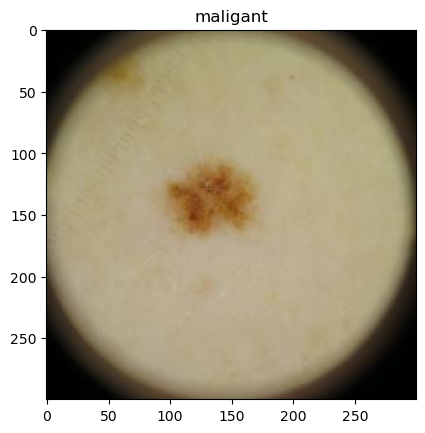

In [12]:
predicted_ = classes[predictions.item()]
import matplotlib.pyplot as plt
plt.imshow(new_image)
plt.title(predicted_)